In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from load_data import *

In [2]:
# P(Coupling)
# P(Coupling/Volcano)

im_paleo = [im_dandak, im_jhumar, im_cook, im_sinha_2011, im_sinha_2015, im_shi_2018, im_shi_2017, im_shi_2014, \
           im_sano_2017]

im_paleo_yy = [yy_dandak, yy_jhumar, yy_cook, yy_sinha_2011, yy_sinha_2015, yy_shi_2018, yy_shi_2017, yy_shi_2014, \
              yy_sano_2017]

im_paleo_volc = [volc_dandak, volc_jhumar, volc_cook, volc_sinha_2011, volc_sinha_2015, volc_shi_2018, volc_shi_2017, \
                volc_shi_2014, volc_sano_2017]
im_event_series = [False, False, False, False, False, False, False, False, False]

nino3_paleo = [nino3_li_2011, nino3_li_2013, nino3_mann_2009, nino3_moy_2002, nino3_arrigo_2005, \
              nino3_mcgregor_2010, nino3_stahle_1998, nino3_emily_geay_2012, nino3_cook_2008, \
              nino3_gergis_2009, nino3_yan_2011, nino3_datwyler_2019, nino3_wilson_2010, \
              nino3_braganza_2009, pdo_mann_2009]

nino3_paleo_yy = [yy_li_2011, yy_li_2013, yy_mann_2009, yy_moy_2002, yy_arrigo_2005, yy_mcgregor_2010, \
                 yy_stahle_1998, yy_emily_geay_2012, yy_cook_2008, yy_gergis_2009, yy_yan_2011, yy_datwyler_2019, \
                 yy_wilson_2010, yy_braganza_2009, yy_mann_2009]

nino3_paleo_volc = [volc_li_2011, volc_li_2013, volc_mann_2009, volc_moy_2002, volc_arrigo_2005, \
                   volc_mcgregor_2010, volc_stahle_1998, volc_emily_geay_2012, volc_cook_2008, \
                   volc_gergis_2009, volc_yan_2011, volc_datwyler_2019, volc_wilson_2010, \
                   volc_braganza_2009, volc_mann_2009]

nino3_event_series = [False, False, False, False, False, False, False, False, False, True, False, False, False, False, \
                     False]

print(im_paleo[0].shape[0])
print(im_dandak.shape[0])
#print(yy_mcgregor_2010)

937
937


In [3]:
def bayesian_calc(yy=yy_model, dnino3=dnino3_djf, im=im_jjas, volc=volc_model, event_en=False, event_im=False):
    
    en_log = np.zeros((yy.shape[0]))
    ln_log = np.zeros((yy.shape[0]))
    
    
    
    if (not event_en):    
        dnino3 = (dnino3 - np.mean(dnino3))/(np.std(dnino3))
        en_log[dnino3>0.5*np.std(dnino3)] = 1.0
        ln_log[dnino3<-0.5*np.std(dnino3)] = 1.0
    else:
        en_log[dnino3==1.0] = 1.0
        ln_log[dnino3==-1.0] = 1.0

    
    dr_log = np.zeros((yy.shape[0]))
    fl_log = np.zeros((yy.shape[0]))
    
    if (not event_im):    
        im = (im - np.mean(im))/(np.std(im))
        dr_log[im<-0.5*np.std(im)] = 1.0
        fl_log[im>0.5*np.std(im)] = 1.0
    else:
        dr_log[im==-1.0] = 1.0
        fl_log[im==1.0] = 1.0

    volc_log = np.zeros((yy.shape[0]))

    p_en_dr_log = np.zeros((yy.shape[0]))
    p_ln_fl_log = np.zeros((yy.shape[0]))

    # Volcanic series 1 0 1 0
    # EN Series       0 1 0 1
    # So in the volcanic series element[i+1] = element[i]
    for i in range(yy.shape[0]-1):
        volc_log[i+1] = volc[i]
        
    p_dr_st_en = np.nansum(dr_log*en_log)/np.nansum(en_log)
    p_fl_st_ln = np.nansum(ln_log*fl_log)/np.nansum(ln_log)
    p_dr_st_en_and_volc = np.nansum(dr_log*en_log*volc_log)/np.nansum(en_log*volc_log)
    p_fl_st_ln_and_volc = np.nansum(fl_log*ln_log*volc_log)/np.nansum(ln_log*volc_log)
    p_coupling = (np.nansum(dr_log*en_log)+np.nansum(ln_log*fl_log))/(np.nansum(en_log)+np.nansum(ln_log))
    p_coupling_st_volc = (np.nansum(dr_log*en_log*volc_log)+np.nansum(fl_log*ln_log*volc_log))/(np.nansum(en_log*volc_log)+np.nansum(ln_log*volc_log))

    return p_dr_st_en, p_fl_st_ln, p_dr_st_en_and_volc, p_fl_st_ln_and_volc, p_coupling, p_coupling_st_volc
p_dr_st_en, p_fl_st_ln, p_dr_st_en_and_volc, p_fl_st_ln_and_volc, p_coupling, p_coupling_st_volc \
                            = bayesian_calc(yy=yy_model, dnino3=dnino3_djf, im=im_jjas, volc=volc_model)


In [4]:
p_coupling_paleo = np.zeros((len(im_paleo), len(nino3_paleo)))
p_coupling_st_volc_paleo = np.zeros((len(im_paleo), len(nino3_paleo)))
p_dr_st_en = np.zeros((len(im_paleo), len(nino3_paleo)))
p_fl_st_ln = np.zeros((len(im_paleo), len(nino3_paleo)))
p_dr_st_en_and_volc = np.zeros((len(im_paleo), len(nino3_paleo)))
p_fl_st_ln_and_volc = np.zeros((len(im_paleo), len(nino3_paleo)))

for im_i in range(len(im_paleo)):
    for nino3_j in range(len(nino3_paleo)):
        if (nino3_paleo_yy[nino3_j][0] < im_paleo_yy[im_i][-1]) and (im_paleo_yy[im_i][0] < nino3_paleo_yy[nino3_j][-1]):
        
            yy_start = max(im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            yy_end = min(im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            

            im_dummy = np.zeros((int(yy_end)-int(yy_start)+1))
            nino3_dummy = np.zeros((int(yy_end)-int(yy_start)+1))
            volc_dummy = np.zeros((int(yy_end)-int(yy_start)+1))
            yy_dummy = np.arange(int(yy_start),int(yy_end)+1)
        
        #print(yy_start, im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
        #print(yy_end, im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            j=0
            for i in range(int(yy_start),int(yy_end)+1):
                #print(i)
                im_idx = np.where(im_paleo_yy[im_i] == i)[0][0]
                im_dummy[j] = im_paleo[im_i][im_idx]
                volc_dummy[j] = im_paleo_volc[im_i][im_idx]
    
                nino3_idx = np.where(nino3_paleo_yy[nino3_j] == i)[0][0]
            #print(nino3_idx)
                nino3_dummy[j] = nino3_paleo[nino3_j][nino3_idx]
                j = j + 1
            p_dr_st_en[im_i,nino3_j], p_fl_st_ln[im_i,nino3_j], p_dr_st_en_and_volc[im_i,nino3_j],  \
            p_fl_st_ln_and_volc[im_i,nino3_j], p_coupling_paleo[im_i,nino3_j], p_coupling_st_volc_paleo[im_i,nino3_j] \
                                = bayesian_calc(yy=yy_dummy, dnino3=nino3_dummy, im=im_dummy, volc=volc_dummy, \
                                    event_en=nino3_event_series[nino3_j], event_im=im_event_series[im_i])
    
p_dr_st_en[p_dr_st_en==0.0] = np.nan
p_fl_st_ln[p_fl_st_ln==0.0] = np.nan
p_dr_st_en_and_volc[p_dr_st_en_and_volc==0.0] = np.nan
p_fl_st_ln_and_volc[p_fl_st_ln_and_volc==0.0] = np.nan
p_coupling_paleo[p_coupling_paleo==0.0] = np.nan
p_coupling_st_volc_paleo[p_coupling_st_volc_paleo==0.0] = np.nan

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


In [6]:
def annotate_heatmap(data):
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x , y , '%.2f' % data[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     )

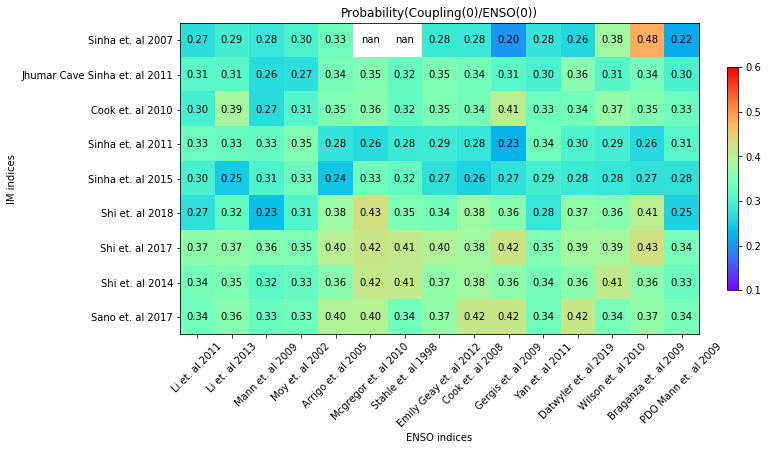

In [8]:
xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009', 'PDO Mann et. al 2009']
yticklabels = ['Sinha et. al 2007', 'Jhumar Cave Sinha et. al 2011', 'Cook et. al 2010', 'Sinha et. al 2011', \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017']

plt.figure(figsize=(10,10))
im = plt.imshow(p_coupling_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
cbar = plt.colorbar(im, fraction=0.02, pad=0.05)
cbar.set_clim(vmin=0.1, vmax=0.6)
plt.xlabel('ENSO indices')
plt.ylabel('IM indices')
plt.title('Probability(Coupling(0)/ENSO(0))')
plt.xticks(ticks=np.arange(15), labels=xticklabels, rotation=45)
plt.yticks(ticks=np.arange(9), labels=yticklabels)
annotate_heatmap(np.around(p_coupling_paleo,decimals=2))

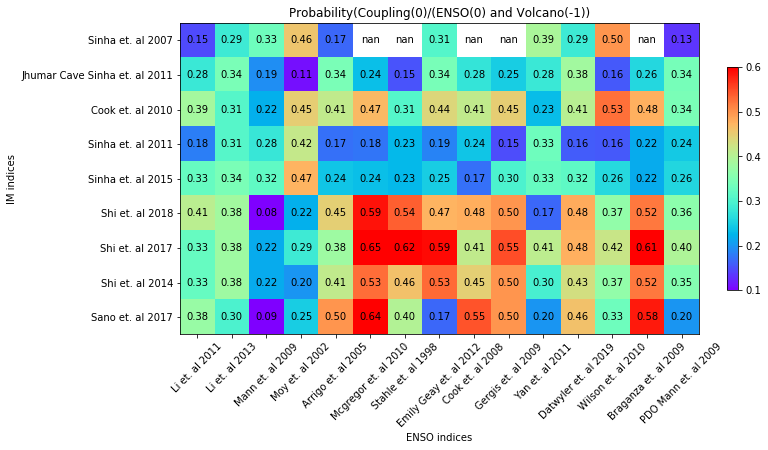

In [9]:
plt.figure(figsize=(10,10))
im = plt.imshow(p_coupling_st_volc_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
cbar = plt.colorbar(im, fraction=0.02, pad=0.05)
cbar.set_clim(0.1, 0.6)
plt.xlabel('ENSO indices')
plt.ylabel('IM indices')
plt.title('Probability(Coupling(0)/(ENSO(0) and Volcano(-1))')
plt.xticks(ticks=np.arange(15), labels=xticklabels, rotation=45)
plt.yticks(ticks=np.arange(9), labels=yticklabels)
annotate_heatmap(np.around(p_coupling_st_volc_paleo,decimals=2))

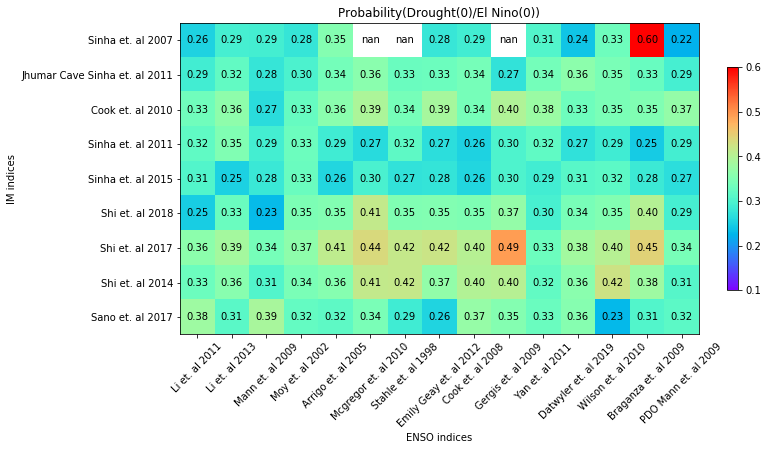

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(p_dr_st_en, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
cbar = plt.colorbar(im, fraction=0.02, pad=0.05)
#cbar.set_clim(vmin=0.1, vmax=0.45)
plt.xlabel('ENSO indices')
plt.ylabel('IM indices')
plt.title('Probability(Drought(0)/El Nino(0))')
plt.xticks(ticks=np.arange(15), labels=xticklabels, rotation=45)
plt.yticks(ticks=np.arange(9), labels=yticklabels)
annotate_heatmap(np.around(p_dr_st_en,decimals=2))

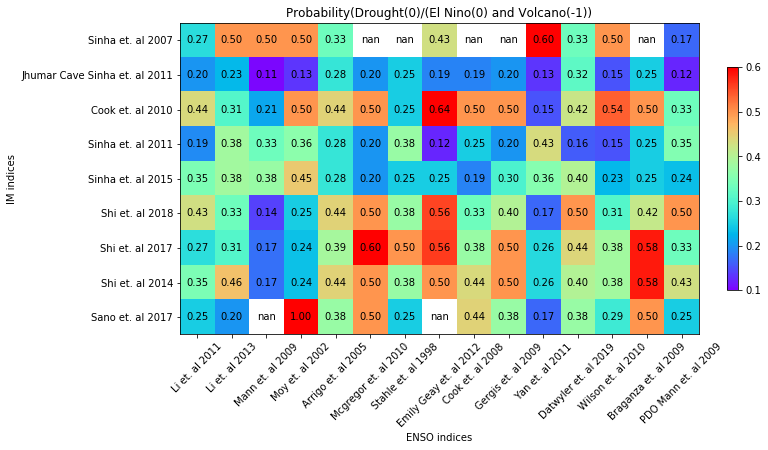

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(p_dr_st_en_and_volc, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
cbar = plt.colorbar(im, fraction=0.02, pad=0.05)
#cbar.set_clim(vmin=0.1, vmax=0.45)
plt.xlabel('ENSO indices')
plt.ylabel('IM indices')
plt.title('Probability(Drought(0)/(El Nino(0) and Volcano(-1))')
plt.xticks(ticks=np.arange(15), labels=xticklabels, rotation=45)
plt.yticks(ticks=np.arange(9), labels=yticklabels)
annotate_heatmap(np.around(p_dr_st_en_and_volc,decimals=2))

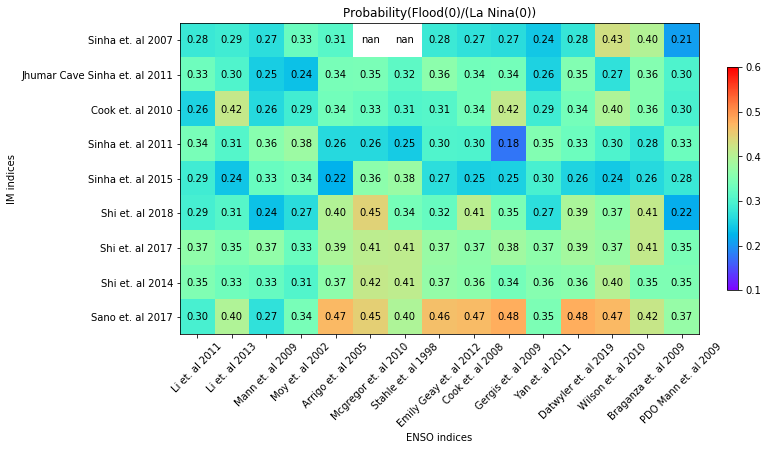

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(p_fl_st_ln, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
cbar = plt.colorbar(im, fraction=0.02, pad=0.05)
#cbar.set_clim(vmin=0.1, vmax=0.45)
plt.xlabel('ENSO indices')
plt.ylabel('IM indices')
plt.title('Probability(Flood(0)/(La Nina(0))')
plt.xticks(ticks=np.arange(15), labels=xticklabels, rotation=45)
plt.yticks(ticks=np.arange(9), labels=yticklabels)
annotate_heatmap(np.around(p_fl_st_ln,decimals=2))

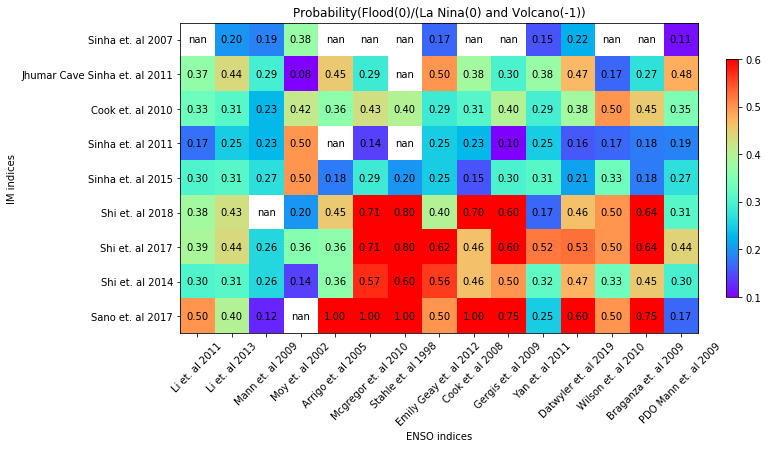

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(p_fl_st_ln_and_volc, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
cbar = plt.colorbar(im, fraction=0.0213, pad=0.05)
#cbar.set_clim(vmin=0.1, vmax=0.45)
plt.xlabel('ENSO indices')
plt.ylabel('IM indices')
plt.title('Probability(Flood(0)/(La Nina(0) and Volcano(-1))')
plt.xticks(ticks=np.arange(15), labels=xticklabels, rotation=45)
plt.yticks(ticks=np.arange(9), labels=yticklabels)
annotate_heatmap(np.around(p_fl_st_ln_and_volc,decimals=2))